# Analysis of results

Packages

In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from pathlib import Path

BASE_DIR = Path(os.path.abspath('')).parent
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## Unimodal Phenotype Model

In [2]:
results_dir = os.path.join(BASE_DIR, 'results', 'pheno')
ab_stats = pd.read_csv(os.path.join(results_dir, 'ab_stats.csv'))
iso_stats = pd.read_csv(os.path.join(results_dir, 'iso_stats.csv'))

#### Antibiotic stats

In [3]:
ab_stats

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,...,"(15, 'num_correct_R')","(16, 'num_R')","(16, 'num_pred_R')","(16, 'num_correct_R')","(17, 'num_R')","(17, 'num_pred_R')","(17, 'num_correct_R')","(18, 'num_R')","(18, 'num_pred_R')","(18, 'num_correct_R')"
0,AMP,25992,11366,0,12634,0,19388,8698,0,0.745922,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
1,CTX,31062,27953,0,28312,0,30185,27694,0,0.971766,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
2,GEN,35091,32347,0,33794,0,32958,32004,0,0.939215,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
3,TOB,17614,16131,0,16412,0,17001,15965,0,0.965198,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
4,CIP,37519,30206,0,32184,0,33721,29296,0,0.898771,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
5,CAZ,34070,31246,0,31400,0,33186,30881,0,0.974053,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
6,CRO,10891,9888,0,9980,0,10647,9812,0,0.977596,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
7,OFX,3627,3024,0,3098,0,3463,2979,0,0.954784,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
8,AMK,19074,18857,0,19031,0,18870,18842,0,0.989305,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
9,AMX,9307,4203,0,4247,0,7007,3075,0,0.752874,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0


**Fig 1**: Compare the accuracy of each antibiotic to the data imbalance

In [4]:
ab_stats.sort_values(by='accuracy', ascending=False)

,antibiotic,num_tot,num_S,num_R,num_pred_S,num_pred_R,num_correct,num_correct_S,num_correct_R,accuracy,...,"(15, 'num_correct_R')","(16, 'num_R')","(16, 'num_pred_R')","(16, 'num_correct_R')","(17, 'num_R')","(17, 'num_pred_R')","(17, 'num_correct_R')","(18, 'num_R')","(18, 'num_pred_R')","(18, 'num_correct_R')"
8,AMK,19074,18857,0,19031,0,18870,18842,0,0.989305,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
16,NET,817,781,0,779,0,801,772,0,0.980416,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
6,CRO,10891,9888,0,9980,0,10647,9812,0,0.977596,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
13,FEP,7739,7013,0,6948,0,7552,6887,0,0.975837,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
5,CAZ,34070,31246,0,31400,0,33186,30881,0,0.974053,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
1,CTX,31062,27953,0,28312,0,30185,27694,0,0.971766,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
3,TOB,17614,16131,0,16412,0,17001,15965,0,0.965198,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
15,NOR,530,395,0,405,0,510,390,0,0.962264,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
10,LVX,7410,5764,0,5896,0,7088,5669,0,0.956545,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0
7,OFX,3627,3024,0,3098,0,3463,2979,0,0.954784,...,120.0,36.0,38.0,29.0,967.0,941.0,884.0,398.0,319.0,294.0


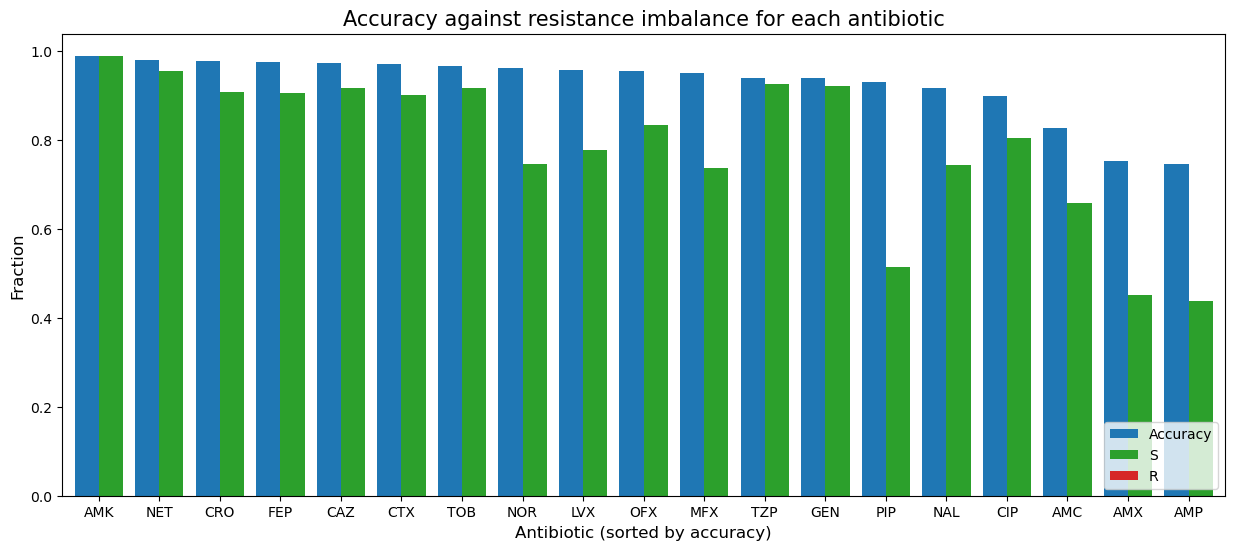

In [5]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats.set_index('antibiotic', inplace=True)

fig, ax = plt.subplots(figsize=(15, 6))
bar1 = sorted_ab_stats['accuracy'].plot.bar(rot=0, width=-0.4, align='edge', color='tab:blue', ax=ax)
bar2 = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
ax.set_title('Accuracy against resistance imbalance for each antibiotic', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.legend(labels=['Accuracy', 'S', 'R'], loc='lower right')   
plt.show()

**Fig 2**: Comparing distributions of predictions to true distributions

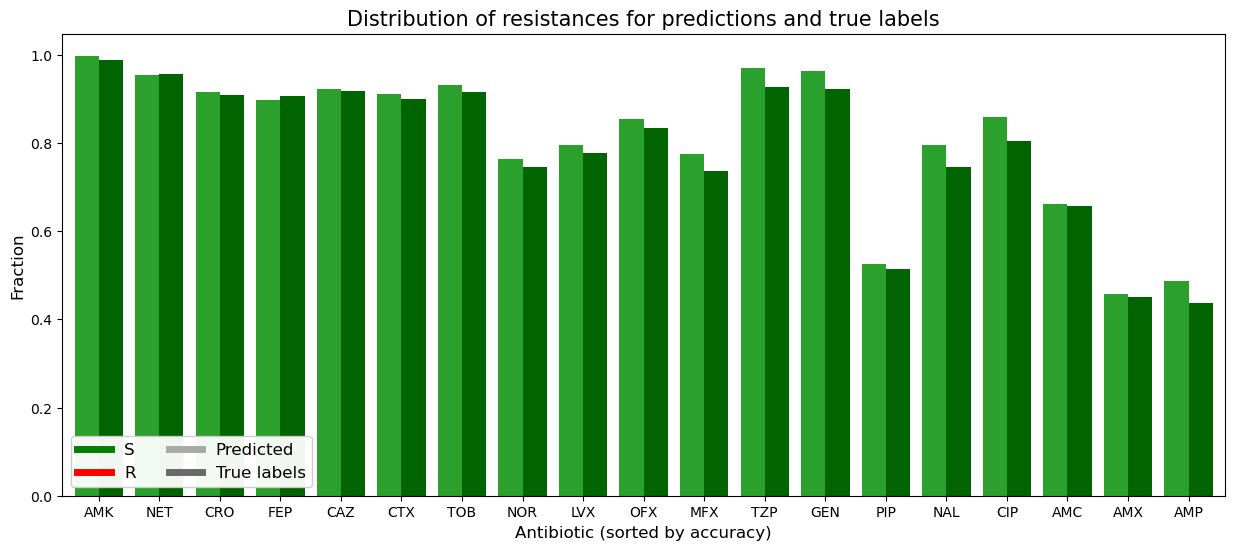

In [6]:
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']

fig, ax = plt.subplots(figsize=(15, 6))
bar_pred = sorted_ab_stats[['S_frac_pred', 'R_frac_pred']].plot.bar(
    rot=0, stacked=True, width=-0.4, align='edge', color=['tab:green', 'tab:red'], ax=ax
)
bar_true = sorted_ab_stats[['S_frac', 'R_frac']].plot.bar(
    rot=0, stacked=True, width=0.4, align='edge', color=['darkgreen', 'darkred'], ax=ax
)
ax.set_title('Distribution of resistances for predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)

from matplotlib.lines import Line2D

S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
ax.legend([S_line, R_line, pred_line, true_line], 
          ['S', 'R', 'Predicted', 'True labels'], 
          loc='lower left', ncol=2, fontsize=12, framealpha=0.95
)
plt.show()

**Fig 3**: Combining Fig 1 and Fig 2 into one plot

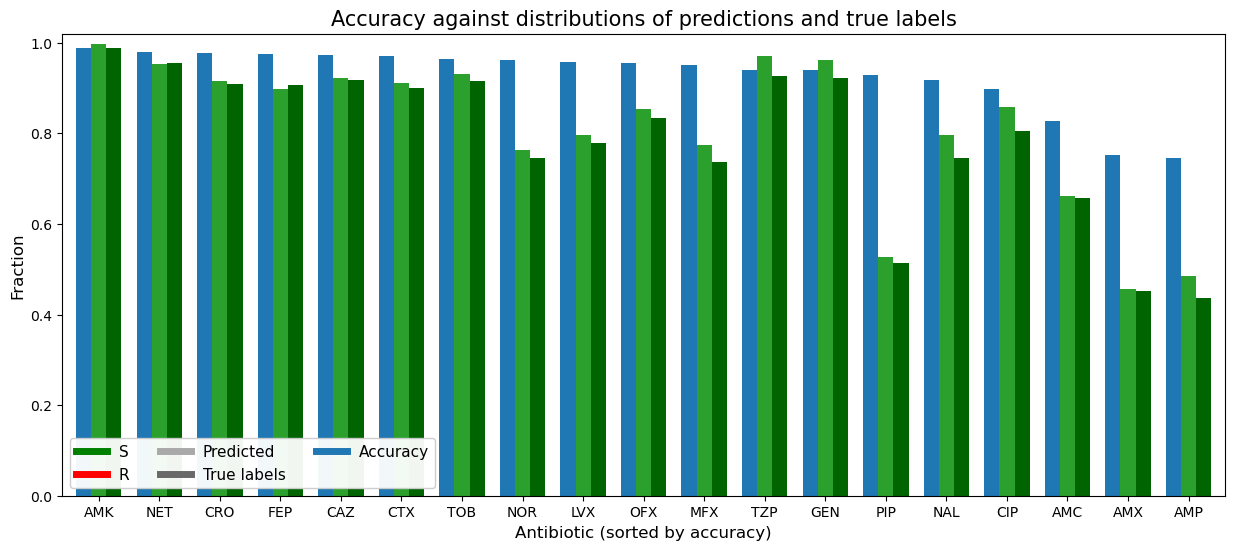

In [7]:
sorted_ab_stats = ab_stats.sort_values(by='accuracy', ascending=False)
sorted_ab_stats['S_frac'] = sorted_ab_stats['num_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac'] = sorted_ab_stats['num_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats['S_frac_pred'] = sorted_ab_stats['num_pred_S'] / sorted_ab_stats['num_tot']
sorted_ab_stats['R_frac_pred'] = sorted_ab_stats['num_pred_R'] / sorted_ab_stats['num_tot']
sorted_ab_stats.set_index('antibiotic', inplace=True)

ind = np.arange(len(sorted_ab_stats))
bar_width = 0.25
fig, ax = plt.subplots(figsize=(15, 6))
bar_acc = ax.bar(ind - bar_width, sorted_ab_stats['accuracy'], bar_width, color='tab:blue')
ax.bar(ind, sorted_ab_stats['S_frac_pred'], bar_width, color='tab:green')
bar_pred = ax.bar(ind, sorted_ab_stats['R_frac_pred'], bar_width,
              bottom=sorted_ab_stats['S_frac_pred'], color='tab:red')
ax.bar(ind + bar_width, sorted_ab_stats['S_frac'], bar_width, color='darkgreen')
bar_true = ax.bar(ind + bar_width, sorted_ab_stats['R_frac'], bar_width,
              bottom=sorted_ab_stats['S_frac'], color='darkred')

ax.set_title('Accuracy against distributions of predictions and true labels', fontsize=15)
ax.set_xlabel('Antibiotic (sorted by accuracy)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_xlim(-0.6, len(sorted_ab_stats) - 0.4)
ax.set_ylim(0, 1.02)
ax.set_xticks(ind, sorted_ab_stats.index)
# ax.legend(labels=['S', 'R', 'Accuracy', 'pred_S', 'pred_R'], loc='lower right') # standard legend

# custom legend
from matplotlib.lines import Line2D

acc_line = Line2D([0], [0], color='tab:blue', lw=5)
S_line = Line2D([0], [0], color='green', lw=5)
R_line = Line2D([0], [0], color='red', lw=5)
pred_line = Line2D([0], [0], color='darkgrey', lw=5)
true_line = Line2D([0], [0], color='dimgrey', lw=5)
sep_line = Line2D([0], [0], color='black', lw=0) 
ax.legend([S_line, R_line, pred_line, true_line, acc_line], 
          ['S', 'R', 'Predicted', 'True labels', 'Accuracy'], 
          loc='lower left', ncol=3, fontsize=11, framealpha=0.95)
plt.show()

#### Isolate stats

In [8]:
iso_stats.head(n=20)

,year,country,gender,age,num_ab,num_R,num_S,num_masked,num_masked_S,num_masked_R,correct_S,correct_R,correct_all,specificity,sensitivity,accuracy
0,2019,IE,M,64.0,7,6,1,3,0,3,0,2,False,NaN,0.666667,0.666667
1,2018,PT,M,66.0,9,2,7,4,3,1,3,1,True,1.000000,1.000000,1.000000
2,2013,AT,F,3.0,6,1,5,1,1,0,1,0,True,1.000000,NaN,1.000000
3,2020,NO,M,73.0,9,0,9,3,3,0,3,0,True,1.000000,NaN,1.000000
4,2004,NL,M,46.0,3,0,3,2,2,0,2,0,True,1.000000,NaN,1.000000
5,2017,FI,M,72.0,5,0,5,2,2,0,2,0,True,1.000000,NaN,1.000000
6,2009,BE,M,77.0,4,2,2,1,1,0,1,0,True,1.000000,NaN,1.000000
7,2011,BE,M,71.0,7,1,6,2,2,0,2,0,True,1.000000,NaN,1.000000
8,2020,IT,F,89.0,8,0,8,1,1,0,1,0,True,1.000000,NaN,1.000000
9,2018,IT,F,0.0,8,0,8,1,1,0,1,0,True,1.000000,NaN,1.000000


In [9]:
df_stats = iso_stats.copy()

**Fig 1**: Compare correctly classified isolates for different sequence lengths

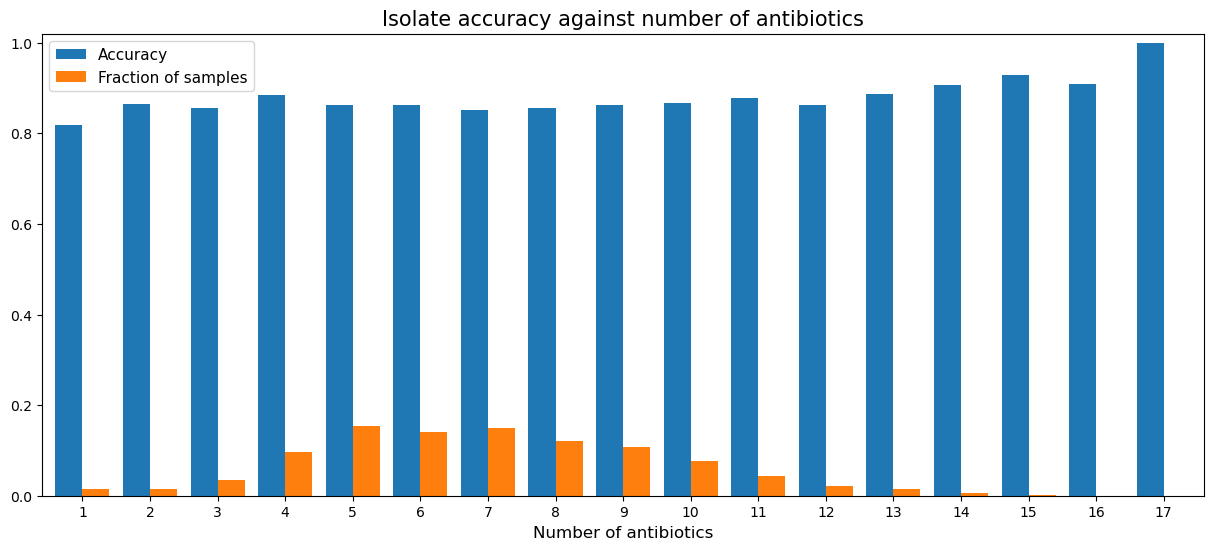

In [10]:
df_tmp = df_stats.groupby('num_ab').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of antibiotics', fontsize=15)
ax.set_xlabel('Number of antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper left', fontsize=11)
plt.show()

**Fig 2**: Compare correctly classified isolates for different number of masked tests

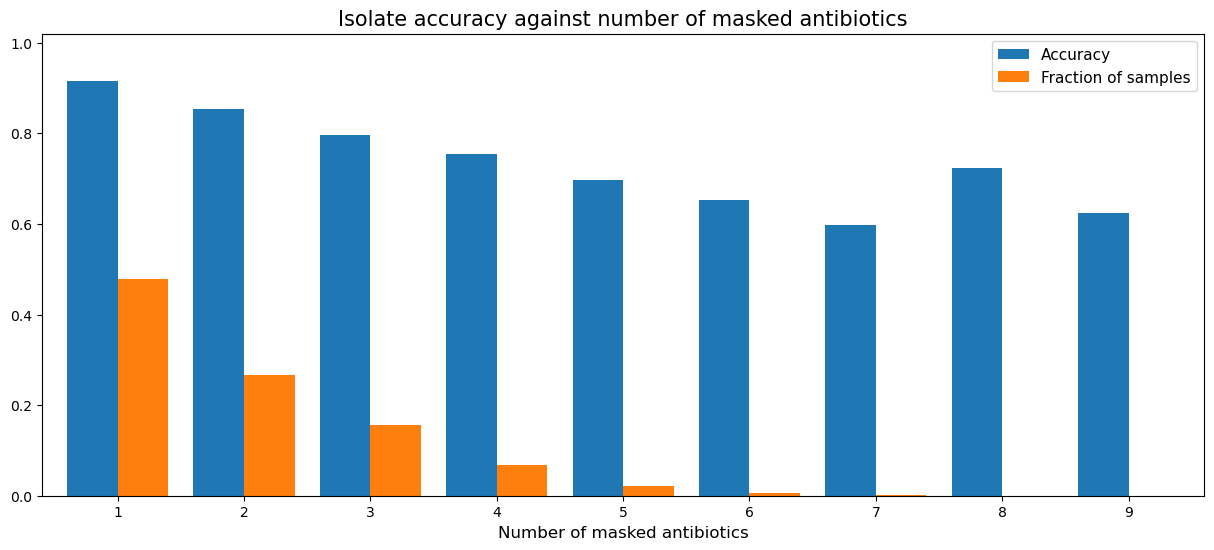

In [11]:
df_tmp = df_stats.groupby('num_masked').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['accuracy'] > 0]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of masked antibiotics', fontsize=15)
ax.set_xlabel('Number of masked antibiotics', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

**Fig 3**: Compare isolate accuracy against fraction of antibiotics that are resistant

       accuracy  count     share
num_R                           
0      0.951390  68916  0.478929
1      0.793925  34798  0.241827
2      0.779438  15932  0.110719
3      0.760662   9121  0.063386
4      0.760722   5433  0.037756
5      0.754005   3683  0.025595
6      0.765736   2399  0.016672
7      0.790978   1574  0.010938
8      0.775269    930  0.006463
9      0.818737    491  0.003412
10     0.853293    334  0.002321
11     0.772152    158  0.001098
12     0.845238     84  0.000584
13     0.906250     32  0.000222
14     1.000000      9  0.000063
15     0.500000      2  0.000014


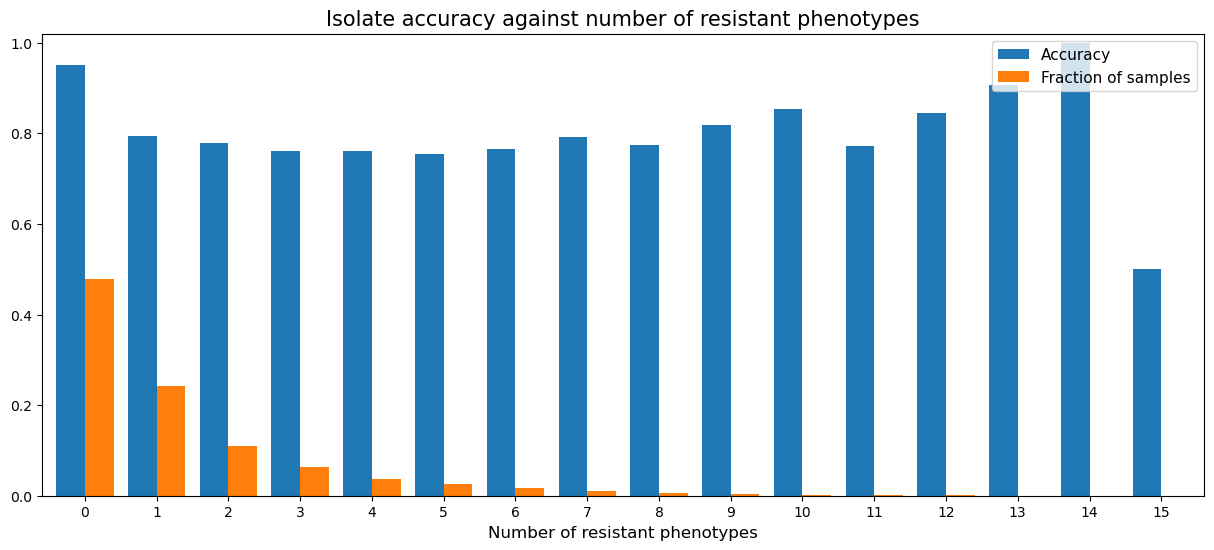

In [12]:
df_tmp = df_stats.groupby('num_R').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp = df_tmp[df_tmp['accuracy'] > 0]
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
print(df_tmp)
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against number of resistant phenotypes', fontsize=15)
ax.set_xlabel('Number of resistant phenotypes', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

C:\Users\jespe\AppData\Local\Temp\ipykernel_24540\3596830834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
C:\Users\jespe\AppData\Local\Temp\ipykernel_24540\3596830834.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])


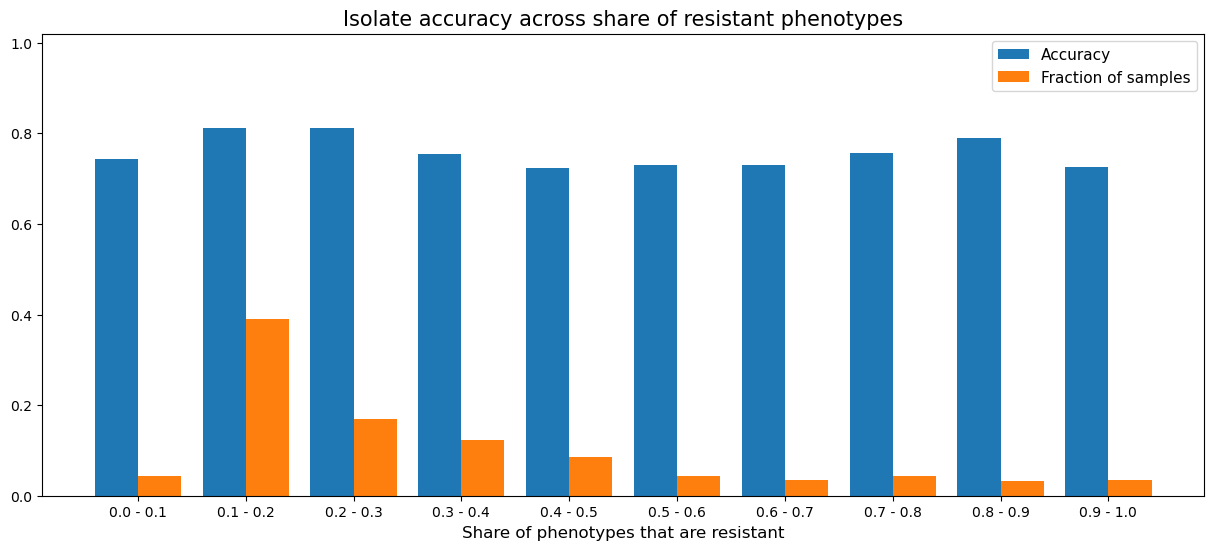

In [13]:
df_tmp = df_stats.copy()
df_tmp['frac_R'] = df_tmp['num_R'] / df_tmp['num_ab']
bins = np.linspace(0, 1, 11)
df_tmp['frac_R_bin'] = pd.cut(df_tmp['frac_R'], bins=bins)
df_tmp = df_tmp.groupby('frac_R_bin').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
df_tmp.head(n=20)
# Extracting the bin edges for labeling the x-axis
bin_edges = df_tmp.index.astype(str).tolist()

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(bin_edges, df_tmp['accuracy'], color='tab:blue', 
       width=-0.4, align='edge', label='Accuracy')
ax.bar(bin_edges, df_tmp['share'], color='tab:orange',
         width=0.4, align='edge', label='Count')

ax.set_ylim(0, 1.02)
ax.set_title('Isolate accuracy across share of resistant phenotypes', fontsize=15)
ax.set_xlabel('Share of phenotypes that are resistant', fontsize=12)
ax.set_xticklabels(['{:.1f} - {:.1f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper right', fontsize=11)
plt.show()

**Fig 4**: Isolate accuracy across countries

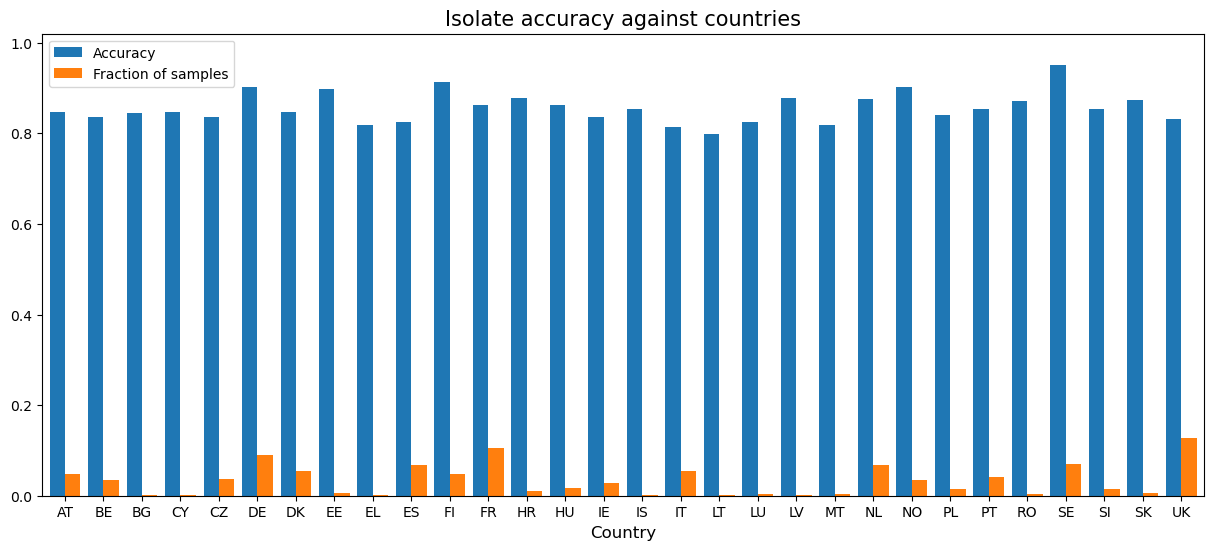

In [14]:
df_tmp = df_stats.groupby('country').agg({'correct_all': ['mean', 'count']})
df_tmp.columns = ['accuracy', 'count']
df_tmp['share'] = df_tmp['count'] / df_tmp['count'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
df_tmp['accuracy'].plot.bar(
    rot=0, width=-0.4, align='edge', color=['tab:blue'], ax=ax
)
df_tmp['share'].plot.bar(
    rot=0, width=0.4, align='edge', color=['tab:orange'], ax=ax
)
ax.set_title('Isolate accuracy against countries', fontsize=15)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylim(0, 1.02)
ax.set_xlim(-0.6, df_tmp.shape[0] - 0.4)
ax.legend(labels=['Accuracy', 'Fraction of samples'], loc='upper left', fontsize=10)
plt.show()